In [1]:
import torch
from train import train_model
from dataset.utils import *
from utils import *
import numpy as np
import pickle
import time

In [2]:
batch_size = 128
def redefine_train_parameters(train_dataset):
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size, image_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 20
    learning_rate = 0.001
    loss_lr = 0.01
    try: num_classes = get_num_classes(train_dataset)
    except: pass
    embedding_size = 512
    image_size = 100
redefine_train_parameters(0)

In [3]:
def train(
    train_loader,
    verbose=0,
    pretrained=1,
    save_path=None,
    model_name='resnet50',
    optimizer='adam',
    loss_func_name='proxy_anchor',
    use_loss_optimizer=False,
    drop_last=False):
    model = train_model(model_name=model_name,
                    loss_func_name=loss_func_name,
                    num_classes=num_classes,
                    dataloader=train_loader,
                    optimizer=optimizer,
                    embedding_size=embedding_size,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    verbose=verbose,
                    use_loss_optimizer=use_loss_optimizer,
                    save_path=save_path)
    return model

In [4]:
def train_eval(name,base_name,enhance_params):
    global test_params, num_classes
    preprocess_dataset(enhance_params)
    train_dataset = make_dataset(
        'LFW',
        **train_params,
    )
    norm_mean,norm_std=normalize_dataset([train_dataset])
    normalize_params = {
        'normalize': 1,
        'norm_mean': norm_mean,
        'norm_std': norm_std
    }
    
    train_dataset = make_dataset(
        'LFW',
        **train_params,
        **normalize_params
    )
    test_dataset = make_dataset(
        'LFW',
        **test_params,
        **normalize_params
    )
    redefine_train_parameters(train_dataset)
    train_loader = load_dataset(train_dataset, batch_size, shuffle=True, drop_last=False)
    test_loader = load_dataset(test_dataset, batch_size, shuffle=False, drop_last=False)
    model = train(train_loader, save_path=f'./saved_models/{name}.ptm')
    model.eval()
    with torch.no_grad():
        save_output(evaluate_cos(model,train_loader),f'train_{name}')
        save_output(evaluate_cos(model,test_loader),f'test_{name}')
        save_output(mapr(model, base_name, test_loader),f'mapr_{name}')
        test_pair_dataset = make_dataset(
            'LFWPairs',
            **test_params,
            **normalize_params
        )
        labels,sim_scores = evaluate(model,test_pair_dataset)
        save_output(labels, 'labels')
        save_output(sim_scores, f'sim_scores_{name}')
        visualize(labels,sim_scores)

In [5]:
train_params = {
    'split': 'train',
    'random': 1,
    'random_resized_crop': image_size
}
test_params = {
    'split': 'test',
    'random': 0,
    'image_size': image_size,
}

Files already downloaded and verified
Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4833, 0.4023, 0.3476]) tensor([0.2468, 0.2186, 0.2093])
time elapsed:  9.814258337020874
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 248.4478 Best loss: 9.5830


100%|███████████████████████████████████████████| 75/75 [00:09<00:00,  8.14it/s]


R@1 : 12.966
R@2 : 17.701
R@4 : 22.226
R@8 : 27.160
R@16 : 32.798
R@32 : 38.142


100%|███████████████████████████████████████████| 29/29 [00:03<00:00,  7.78it/s]


R@1 : 15.318
R@2 : 20.254
R@4 : 26.025
R@8 : 31.904
R@16 : 37.999
R@32 : 43.581


EVALUATING: 100%|███████████████████████████████| 29/29 [00:04<00:00,  7.13it/s]


MAP@R: 5.6101
Files already downloaded and verified


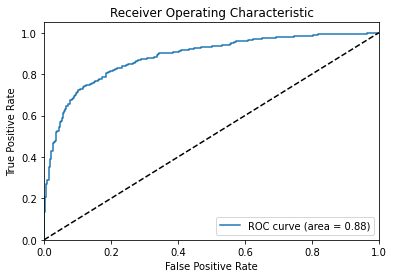

TAR@FAR:
    1%: 0.7200
  0.1%: 0.2900
 0.01%: 0.1320
0.001%: 0.1320
Accuracy: 0.812, Threshold: 0.6621517539024353


In [39]:
name='PA'
enhance_params = {}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4832, 0.4029, 0.3486]) tensor([0.2471, 0.2191, 0.2099])
time elapsed:  9.919955968856812
PA+FaceDetection(pad_ratio=1)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.30it/s]


R@1 : 9.763
R@2 : 14.374
R@4 : 19.417
R@8 : 24.272
R@16 : 30.556
R@32 : 37.082


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


MAP@R: 2.9110
Files already downloaded and verified


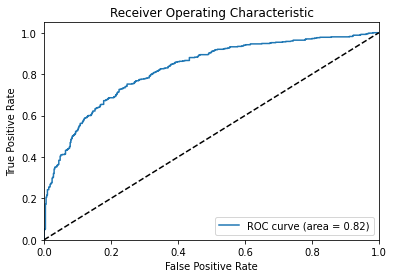

TAR@FAR:
    1%: 0.5320
  0.1%: 0.2420
 0.01%: 0.0480
0.001%: 0.0480
Accuracy: 0.751, Threshold: 0.6700721383094788
PA+FaceDetection(pad_ratio=1.2)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.31it/s]


R@1 : 12.028
R@2 : 17.098
R@4 : 23.166
R@8 : 29.369
R@16 : 34.898
R@32 : 41.694


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


MAP@R: 3.9353
Files already downloaded and verified


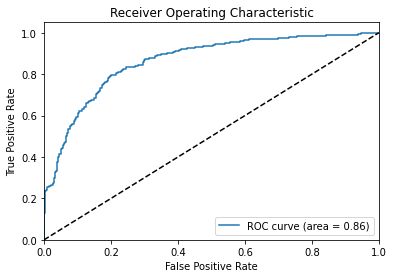

TAR@FAR:
    1%: 0.6080
  0.1%: 0.2540
 0.01%: 0.1280
0.001%: 0.1280
Accuracy: 0.796, Threshold: 0.6683155298233032
PA+FaceDetection(pad_ratio=1.4)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.32it/s]


R@1 : 13.296
R@2 : 19.256
R@4 : 24.919
R@8 : 31.122
R@16 : 36.920
R@32 : 43.339


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


MAP@R: 4.7110
Files already downloaded and verified


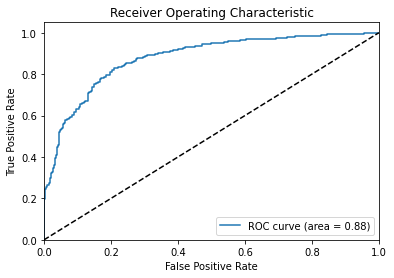

TAR@FAR:
    1%: 0.6320
  0.1%: 0.2640
 0.01%: 0.1980
0.001%: 0.1980
Accuracy: 0.808, Threshold: 0.6367822885513306
PA+FaceDetection(pad_ratio=1.6)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.31it/s]


R@1 : 14.941
R@2 : 20.065
R@4 : 25.728
R@8 : 31.742
R@16 : 38.188
R@32 : 44.687


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


MAP@R: 5.1253
Files already downloaded and verified


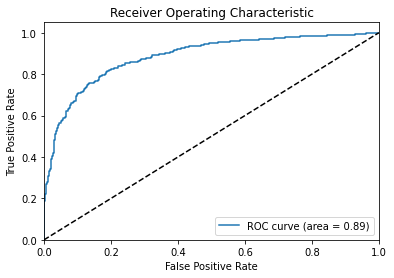

TAR@FAR:
    1%: 0.7060
  0.1%: 0.2780
 0.01%: 0.1860
0.001%: 0.1860
Accuracy: 0.813, Threshold: 0.6321433186531067
PA+FaceDetection(pad_ratio=1.8)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.30it/s]


R@1 : 15.372
R@2 : 21.117
R@4 : 26.969
R@8 : 32.093
R@16 : 38.323
R@32 : 44.364


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.30it/s]


MAP@R: 5.4815
Files already downloaded and verified


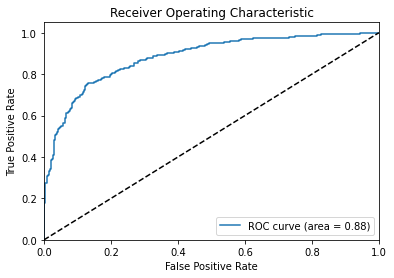

TAR@FAR:
    1%: 0.6860
  0.1%: 0.3100
 0.01%: 0.1780
0.001%: 0.1780
Accuracy: 0.812, Threshold: 0.6592337489128113
PA+FaceDetection(pad_ratio=2)
Files already downloaded and verified


100%|███████████████████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


R@1 : 14.617
R@2 : 19.930
R@4 : 26.214
R@8 : 31.931
R@16 : 37.271
R@32 : 42.772


EVALUATING: 100%|███████████████████████████████| 29/29 [00:22<00:00,  1.29it/s]


MAP@R: 5.2887
Files already downloaded and verified


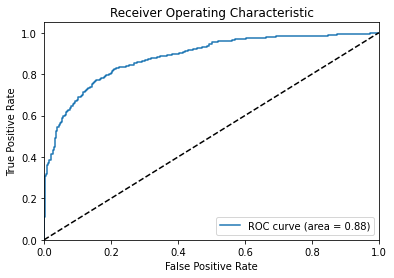

TAR@FAR:
    1%: 0.6760
  0.1%: 0.3620
 0.01%: 0.1100
0.001%: 0.1100
Accuracy: 0.808, Threshold: 0.6445850729942322


In [42]:
train_dataset = make_dataset(
    'LFW',
    **train_params,
)
norm_mean,norm_std=normalize_dataset([train_dataset])
print('====================================')
normalize_params = {
    'normalize': 1,
    'norm_mean': norm_mean,
    'norm_std': norm_std
}

model = torch.load('./saved_models/PA.ptm')
model.eval()
with torch.no_grad():
    for pad_ratio in [1,1.2,1.4,1.6,1.8,2]:
        test_params = {
            'split': 'test',
            'random': 0,
            'image_size': image_size,
            'face_detection': 1,
            'pad_ratio': pad_ratio
        }
        name=f'PA+FaceDetection(pad_ratio={pad_ratio})'
        print(name)
        test_dataset = make_dataset(
            'LFW',
            **test_params,
            **normalize_params
        )
        test_loader = load_dataset(test_dataset, batch_size, shuffle=False, drop_last=False)
        save_output(evaluate_cos(model,test_loader),f'test_{name}')
        save_output(mapr(model, 'PA', test_loader),f'mapr_{name}')
        test_pair_dataset = make_dataset(
            'LFWPairs',
            **test_params,
            **normalize_params
        )
        labels,sim_scores = evaluate(model,test_pair_dataset)
        save_output(labels, 'labels')
        save_output(sim_scores, f'sim_scores_{name}')
        visualize(labels,sim_scores)
        print('====================================')

In [6]:
train_params = {
    'split': 'train',
    'random': 1,
    'random_resized_crop': image_size
}
test_params = {
    'split': 'test',
    'random': 0,
    'image_size': image_size,
}

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4810, 0.4017, 0.3455]) tensor([0.2413, 0.2139, 0.2046])
time elapsed:  6.676120042800903
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.2753 Best loss: 9.7141


100%|███████████████████████████████████████████| 75/75 [00:05<00:00, 12.54it/s]


R@1 : 9.806
R@2 : 14.278
R@4 : 18.782
R@8 : 23.717
R@16 : 28.714
R@32 : 33.932


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.32it/s]


R@1 : 11.354
R@2 : 15.237
R@4 : 20.334
R@8 : 26.160
R@16 : 31.365
R@32 : 37.891


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.94it/s]


MAP@R: 3.4681
Files already downloaded and verified


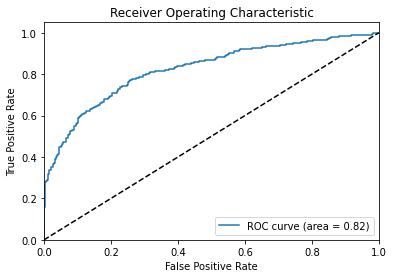

TAR@FAR:
    1%: 0.5820
  0.1%: 0.2880
 0.01%: 0.1580
0.001%: 0.1580
Accuracy: 0.757, Threshold: 0.5994879603385925


In [8]:
name='PA+MeanUnsharp(size=1)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 1,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4829, 0.4045, 0.3492]) tensor([0.2492, 0.2223, 0.2122])
time elapsed:  6.679726600646973
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.0392 Best loss: 9.5667


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.41it/s]


R@1 : 12.262
R@2 : 16.399
R@4 : 21.039
R@8 : 26.100
R@16 : 31.612
R@32 : 37.249


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.11it/s]


R@1 : 13.943
R@2 : 18.878
R@4 : 23.975
R@8 : 29.207
R@16 : 35.059
R@32 : 40.965


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.91it/s]


MAP@R: 4.2734
Files already downloaded and verified


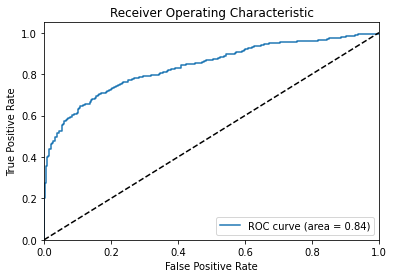

TAR@FAR:
    1%: 0.6220
  0.1%: 0.4020
 0.01%: 0.2020
0.001%: 0.2020
Accuracy: 0.77, Threshold: 0.6061484217643738


In [9]:
name='PA+MeanUnsharp(size=3)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 3,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4832, 0.4052, 0.3504]) tensor([0.2583, 0.2317, 0.2209])
time elapsed:  6.972588062286377
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.1340 Best loss: 9.5904


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.16it/s]


R@1 : 12.052
R@2 : 16.850
R@4 : 21.207
R@8 : 26.362
R@16 : 31.255
R@32 : 36.619


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.00it/s]


R@1 : 14.159
R@2 : 19.148
R@4 : 24.380
R@8 : 29.881
R@16 : 35.707
R@32 : 42.179


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.67it/s]


MAP@R: 4.4545
Files already downloaded and verified


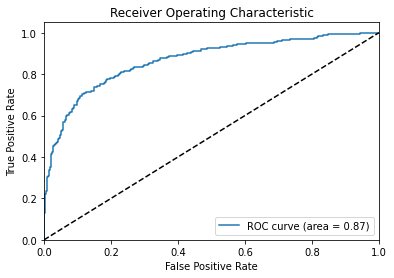

TAR@FAR:
    1%: 0.6720
  0.1%: 0.3040
 0.01%: 0.1300
0.001%: 0.1300
Accuracy: 0.794, Threshold: 0.6601957082748413


In [10]:
name='PA+MeanUnsharp(size=5)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 5,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4816, 0.4019, 0.3454]) tensor([0.2418, 0.2143, 0.2047])
time elapsed:  6.733096122741699
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 181.9503 Best loss: 9.7175


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.49it/s]


R@1 : 9.291
R@2 : 13.260
R@4 : 17.932
R@8 : 22.677
R@16 : 27.874
R@32 : 33.459


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.30it/s]


R@1 : 10.680
R@2 : 14.455
R@4 : 19.391
R@8 : 25.351
R@16 : 31.850
R@32 : 37.918


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.85it/s]


MAP@R: 3.2511
Files already downloaded and verified


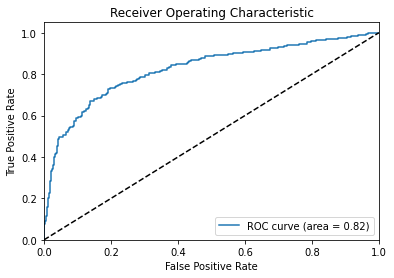

TAR@FAR:
    1%: 0.5880
  0.1%: 0.1560
 0.01%: 0.0760
0.001%: 0.0760
Accuracy: 0.767, Threshold: 0.6433137059211731


In [11]:
name='PA+MedianUnsharp(size=1)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 1,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4813, 0.4029, 0.3477]) tensor([0.2491, 0.2220, 0.2121])
time elapsed:  6.79857325553894
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.2921 Best loss: 9.6769


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.37it/s]


R@1 : 10.761
R@2 : 14.646
R@4 : 19.328
R@8 : 24.357
R@16 : 29.659
R@32 : 35.213


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.10it/s]


R@1 : 12.298
R@2 : 17.017
R@4 : 22.519
R@8 : 28.128
R@16 : 34.547
R@32 : 40.777


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.61it/s]


MAP@R: 3.9962
Files already downloaded and verified


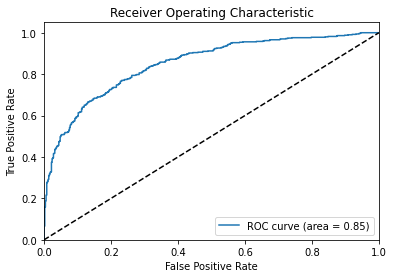

TAR@FAR:
    1%: 0.5980
  0.1%: 0.2820
 0.01%: 0.0660
0.001%: 0.0660
Accuracy: 0.768, Threshold: 0.6164625287055969


In [12]:
name='PA+MedianUnsharp(size=3)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 3,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4830, 0.4051, 0.3504]) tensor([0.2589, 0.2320, 0.2209])
time elapsed:  6.8369505405426025
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 182.9655 Best loss: 9.5914


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.13it/s]


R@1 : 10.866
R@2 : 15.601
R@4 : 20.052
R@8 : 24.882
R@16 : 30.184
R@32 : 35.822


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.13it/s]


R@1 : 11.785
R@2 : 16.667
R@4 : 22.114
R@8 : 28.020
R@16 : 34.709
R@32 : 40.210


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.68it/s]


MAP@R: 4.0047
Files already downloaded and verified


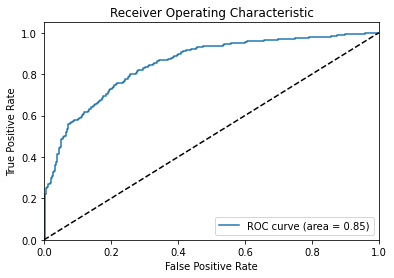

TAR@FAR:
    1%: 0.5820
  0.1%: 0.2540
 0.01%: 0.0100
0.001%: 0.0100
Accuracy: 0.77, Threshold: 0.6117749214172363


In [13]:
name='PA+MedianUnsharp(size=5)'
enhance_params = {
    'image_size': image_size,
    'mean_unsharp': 1,
    'mean_unsharp_size': 5,
    'mean_unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4806, 0.4011, 0.3476]) tensor([0.2517, 0.2243, 0.2143])
time elapsed:  6.920706510543823
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.6141 Best loss: 9.6811


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.41it/s]


R@1 : 10.362
R@2 : 14.194
R@4 : 18.824
R@8 : 23.591
R@16 : 28.672
R@32 : 34.383


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.90it/s]


R@1 : 12.244
R@2 : 16.748
R@4 : 21.575
R@8 : 27.427
R@16 : 33.549
R@32 : 39.482


EVALUATING: 100%|███████████████████████████████| 29/29 [00:02<00:00, 13.52it/s]


MAP@R: 3.8679
Files already downloaded and verified


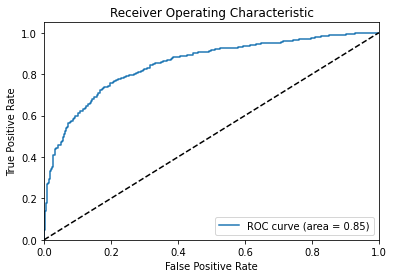

TAR@FAR:
    1%: 0.6020
  0.1%: 0.2700
 0.01%: 0.0480
0.001%: 0.0480
Accuracy: 0.779, Threshold: 0.6209981441497803


In [45]:
name='PA+Unsharp(radius=1, amount=1)'
enhance_params = {
    'image_size': image_size,
    'unsharp': 1,
    'unsharp_radius': 1,
    'unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4827, 0.4042, 0.3522]) tensor([0.2788, 0.2489, 0.2357])
time elapsed:  6.9990339279174805
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 184.1645 Best loss: 9.5106


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.24it/s]


R@1 : 12.294
R@2 : 16.577
R@4 : 21.186
R@8 : 26.121
R@16 : 31.244
R@32 : 36.220


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.03it/s]


R@1 : 13.943
R@2 : 19.040
R@4 : 23.732
R@8 : 28.776
R@16 : 34.898
R@32 : 41.100


EVALUATING: 100%|███████████████████████████████| 29/29 [00:02<00:00, 13.51it/s]


MAP@R: 4.4193
Files already downloaded and verified


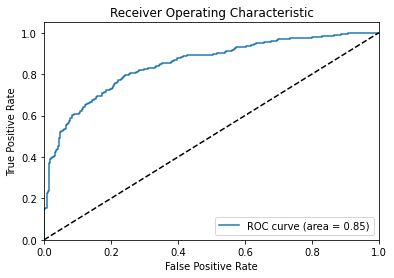

TAR@FAR:
    1%: 0.6080
  0.1%: 0.2280
 0.01%: 0.1500
0.001%: 0.1500
Accuracy: 0.776, Threshold: 0.5622311234474182


In [14]:
name='PA+Unsharp(radius=3, amount=1)'
enhance_params = {
    'image_size': image_size,
    'unsharp': 1,
    'unsharp_radius': 3,
    'unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4859, 0.4069, 0.3545]) tensor([0.2980, 0.2646, 0.2484])
time elapsed:  6.798919677734375
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.3454 Best loss: 9.5059


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.41it/s]


R@1 : 12.136
R@2 : 16.661
R@4 : 21.249
R@8 : 25.900
R@16 : 30.457
R@32 : 35.654


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 15.18it/s]


R@1 : 14.860
R@2 : 19.822
R@4 : 24.946
R@8 : 30.771
R@16 : 36.435
R@32 : 42.341


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.75it/s]


MAP@R: 4.8674
Files already downloaded and verified


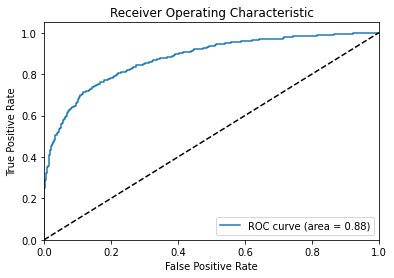

TAR@FAR:
    1%: 0.6740
  0.1%: 0.3500
 0.01%: 0.2480
0.001%: 0.2480
Accuracy: 0.797, Threshold: 0.6146566271781921


In [46]:
name='PA+Unsharp(radius=5, amount=1)'
enhance_params = {
    'image_size': image_size,
    'unsharp': 1,
    'unsharp_radius': 5,
    'unsharp_amount': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4798, 0.3974, 0.3456]) tensor([0.2350, 0.2071, 0.1988])
time elapsed:  6.649752616882324
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 181.6398 Best loss: 9.6392


100%|███████████████████████████████████████████| 75/75 [00:05<00:00, 12.53it/s]


R@1 : 9.344
R@2 : 12.861
R@4 : 16.997
R@8 : 21.722
R@16 : 26.803
R@32 : 32.420


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.24it/s]


R@1 : 12.891
R@2 : 17.206
R@4 : 22.114
R@8 : 27.859
R@16 : 33.819
R@32 : 39.347


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.84it/s]


MAP@R: 3.8339
Files already downloaded and verified


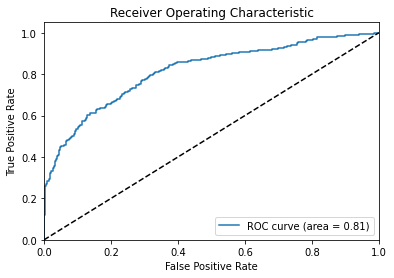

TAR@FAR:
    1%: 0.5360
  0.1%: 0.2840
 0.01%: 0.1220
0.001%: 0.1220
Accuracy: 0.74, Threshold: 0.5567620396614075


In [47]:
name='PA+Mean(size=3)'
enhance_params = {
    'image_size': image_size,
    'mean': 1,
    'mean_size': 3
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

/workspace/Experiments/Clean/dataset/transform.py:177: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  return gaussian(img, sigma=self.sigma)


Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4811, 0.4011, 0.3468]) tensor([0.2309, 0.2032, 0.1946])
time elapsed:  6.7989866733551025
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 182.1139 Best loss: 9.6665


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.45it/s]


R@1 : 10.247
R@2 : 14.257
R@4 : 18.782
R@8 : 24.042
R@16 : 29.239
R@32 : 34.667


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.30it/s]


R@1 : 11.839
R@2 : 15.669
R@4 : 21.413
R@8 : 27.077
R@16 : 33.684
R@32 : 39.536


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.86it/s]


MAP@R: 3.7367
Files already downloaded and verified


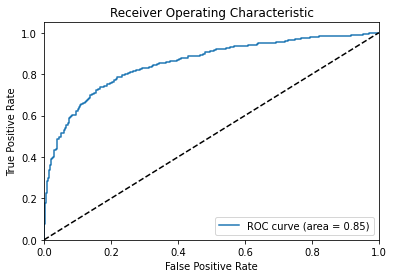

TAR@FAR:
    1%: 0.6240
  0.1%: 0.2860
 0.01%: 0.0740
0.001%: 0.0740
Accuracy: 0.784, Threshold: 0.6225512027740479


In [8]:
name='PA+Gaussian(sigma=1)'
enhance_params = {
    'image_size': image_size,
    'gaussian': 1,
    'gaussian_sigma': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4814, 0.4004, 0.3461]) tensor([0.2392, 0.2114, 0.2024])
time elapsed:  6.700176954269409
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 182.4558 Best loss: 9.7128


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.38it/s]


R@1 : 10.005
R@2 : 13.879
R@4 : 17.995
R@8 : 23.003
R@16 : 28.084
R@32 : 33.795


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.25it/s]


R@1 : 11.785
R@2 : 16.424
R@4 : 21.386
R@8 : 26.375
R@16 : 31.850
R@32 : 38.673


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 15.00it/s]


MAP@R: 3.6621
Files already downloaded and verified


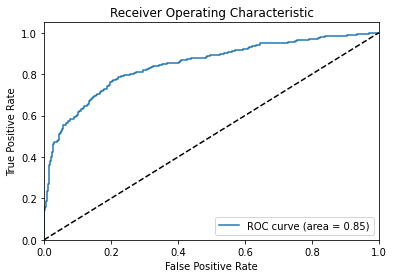

TAR@FAR:
    1%: 0.6160
  0.1%: 0.2380
 0.01%: 0.1440
0.001%: 0.1440
Accuracy: 0.782, Threshold: 0.6123443245887756


In [15]:
name='PA+Median(size=3)'
enhance_params = {
    'image_size': image_size,
    'median': 1,
    'median_size': 3
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4996, 0.4191, 0.3635]) tensor([0.2542, 0.2283, 0.2193])
time elapsed:  6.8441245555877686
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 186.9652 Best loss: 9.6435


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.30it/s]


R@1 : 10.100
R@2 : 14.341
R@4 : 18.961
R@8 : 24.357
R@16 : 29.312
R@32 : 34.404


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.93it/s]


R@1 : 12.190
R@2 : 17.853
R@4 : 23.139
R@8 : 29.261
R@16 : 34.951
R@32 : 40.561


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.90it/s]


MAP@R: 3.7760
Files already downloaded and verified


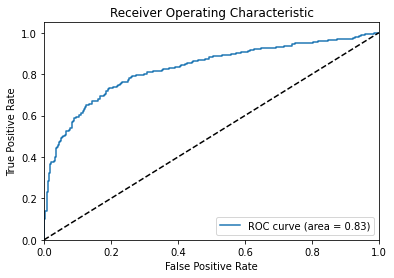

TAR@FAR:
    1%: 0.5940
  0.1%: 0.2320
 0.01%: 0.1000
0.001%: 0.1000
Accuracy: 0.769, Threshold: 0.6345759034156799


In [6]:
name='PA+Adapthist(clip_limit=.01)'
enhance_params = {
    'image_size': image_size,
    'hist': 1,
    'clip_limit': .01,
    'nbins': 512
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.5011, 0.4197, 0.3641]) tensor([0.2537, 0.2281, 0.2191])
time elapsed:  6.938429594039917
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 184.1029 Best loss: 9.5730


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.27it/s]


R@1 : 11.654
R@2 : 16.094
R@4 : 20.924
R@8 : 26.047
R@16 : 31.360
R@32 : 36.546


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 17.14it/s]


R@1 : 14.051
R@2 : 18.878
R@4 : 24.002
R@8 : 29.531
R@16 : 35.491
R@32 : 40.965


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.77it/s]


MAP@R: 4.8416
Files already downloaded and verified


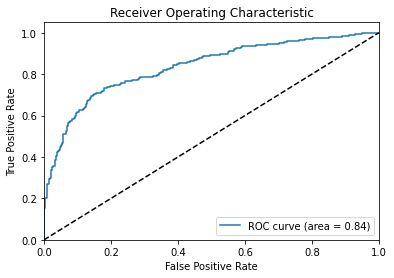

TAR@FAR:
    1%: 0.6160
  0.1%: 0.2700
 0.01%: 0.1520
0.001%: 0.1520
Accuracy: 0.777, Threshold: 0.6475549936294556


In [7]:
name='PA+Adapthist(clip_limit=.001)'
enhance_params = {
    'image_size': image_size,
    'hist': 1,
    'clip_limit': .001,
    'nbins': 512
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.4912, 0.4194, 0.3656]) tensor([0.2483, 0.2251, 0.2161])
time elapsed:  6.942377328872681
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.8545 Best loss: 9.6026


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.30it/s]


R@1 : 12.619
R@2 : 16.682
R@4 : 21.354
R@8 : 26.047
R@16 : 30.782
R@32 : 36.063


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.99it/s]


R@1 : 14.213
R@2 : 19.175
R@4 : 24.380
R@8 : 29.962
R@16 : 36.111
R@32 : 42.179


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.62it/s]


MAP@R: 4.7157
Files already downloaded and verified


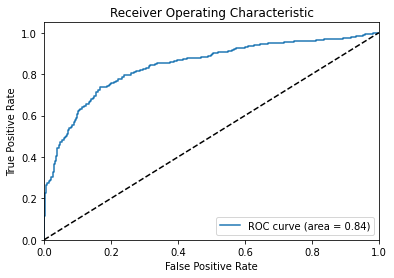

TAR@FAR:
    1%: 0.6180
  0.1%: 0.2720
 0.01%: 0.1160
0.001%: 0.1160
Accuracy: 0.784, Threshold: 0.6298776865005493


In [8]:
name='PA+AutoContrast'
enhance_params = {
    'image_size': image_size,
    'autocontrast': 1
}
train_eval(name,'PA',enhance_params)

Files already downloaded and verified


Preprocessing Dataset...:   0%|          | 0/13233 [00:00<?, ?it/s]

Files already downloaded and verified
==> Computing mean and std..


  0%|          | 0/9525 [00:00<?, ?it/s]

tensor([0.5364, 0.4465, 0.3851]) tensor([0.2428, 0.2148, 0.2073])
time elapsed:  7.001610994338989
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [2/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [3/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [4/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [5/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [6/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [7/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [8/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [9/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [10/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [11/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [12/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [13/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [14/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [15/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [16/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [17/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [18/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [19/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch [20/20]:   0%|          | 0/75 [00:00<?, ?it/s]

Finished Training, Time: 183.8343 Best loss: 9.6062


100%|███████████████████████████████████████████| 75/75 [00:06<00:00, 12.31it/s]


R@1 : 10.320
R@2 : 14.604
R@4 : 19.654
R@8 : 24.399
R@16 : 29.659
R@32 : 35.601


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.65it/s]


R@1 : 12.298
R@2 : 17.233
R@4 : 22.546
R@8 : 27.805
R@16 : 34.196
R@32 : 40.561


EVALUATING: 100%|███████████████████████████████| 29/29 [00:01<00:00, 14.73it/s]


MAP@R: 3.9184
Files already downloaded and verified


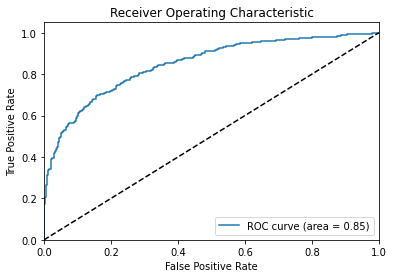

TAR@FAR:
    1%: 0.6100
  0.1%: 0.3120
 0.01%: 0.1720
0.001%: 0.1720
Accuracy: 0.769, Threshold: 0.6058487296104431


In [9]:
name='PA+AdjustLog'
enhance_params = {
    'image_size': image_size,
    'adjust_log': 1,
    'adjust_log_gain': 1,
}
train_eval(name,'PA',enhance_params)